In [ ]:
import sys
import os
py_file_location = "/content/drive/My Drive"
sys.path.append(os.path.abspath(py_file_location))

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from utils import *



In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

##TASK 1A. INITIAL DATA EXPLORATION

##1. Identify the attributes of the dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 32130_AT2_25422229.csv to 32130_AT2_25422229.csv


In [ ]:
missing_values = ['?', '.', '', ' ', '_', 'Na', 'NULL', 'null', 'not', 'Not', 'NaN', 'NA', '??', 'nan', 'inf']
raw_data = pd.read_csv('32130_AT2_25422229.csv', na_values=missing_values)

# Columns where '0' should NOT be considered a missing value
exclude_zero_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Identify columns where '0' should be considered a missing value
include_zero_cols = [col for col in raw_data.columns if col not in exclude_zero_cols]

# Replace '0' with NaN in the specified columns
for col in include_zero_cols:
    if raw_data[col].dtype in ['int64', 'float64']: # Only apply to numeric columns
        raw_data[col] = raw_data[col].replace(0, np.nan)
    elif raw_data[col].dtype == 'object': # Handle object type columns which might contain '0' as a string
         raw_data[col] = raw_data[col].replace('0', np.nan)


# drop ID column that unneccessary in the dataset
raw_data = raw_data.drop(['id'], axis=1)


print('Number of entries:', raw_data.shape[0])
print('Number of attributes:', raw_data.shape[1])

Number of entries: 16625
Number of attributes: 23


In [ ]:
import io
buffer = io.StringIO() # Create a buffer to hold the output and capture the info of DataFrame into a string
raw_data.info(buf=buffer) # Check data types and missing values and
info_str = buffer.getvalue().replace("<class 'pandas.core.frame.DataFrame'>\n", '')

display_html(f"""
    <div style='width:30%; float: left; overflow-x: auto;'>
        <pre>{info_str}</pre>
    </div>
    <div style='width:70%; float: right; overflow-x: auto;'>
        {raw_data.head(15).round(2).to_html()}
    </div>
""", raw=True) # Display the info and head side by side

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,58,Personal Travel,Eco,1598,3.0,4.0,2.0,1,5.0,4.0,5,1.0,1,2.0,1,5,1,3.0,0,0.0,neutral or dissatisfied
1,Female,Loyal Customer,7,Personal Travel,Eco,361,1.0,5.0,4.0,2,4.0,4.0,4,4.0,3,3.0,4,3,5,4.0,17,13.0,neutral or dissatisfied
2,Female,disloyal Customer,39,Business travel,Business,868,3.0,4.0,4.0,5,2.0,4.0,2,2.0,5,4.0,4,3,4,2.0,0,2.0,neutral or dissatisfied
3,Female,Loyal Customer,67,Business travel,Eco,280,4.0,3.0,3.0,3,2.0,4.0,4,4.0,4,4.0,4,2,4,2.0,0,0.0,neutral or dissatisfied
4,Female,Loyal Customer,54,Personal Travel,Eco,308,1.0,5.0,1.0,4,2.0,4.0,5,2.0,2,1.0,3,4,2,3.0,7,0.0,neutral or dissatisfied
5,Female,disloyal Customer,21,Business travel,Eco Plus,903,4.0,3.0,4.0,4,1.0,4.0,1,1.0,4,5.0,3,1,4,1.0,35,28.0,neutral or dissatisfied
6,Female,disloyal Customer,25,Business travel,Eco,689,3.0,3.0,3.0,4,5.0,3.0,2,5.0,1,5.0,4,4,3,5.0,0,0.0,neutral or dissatisfied
7,Male,Loyal Customer,31,Business travel,Business,2332,3.0,1.0,1.0,1,3.0,3.0,3,3.0,4,3.0,4,3,3,3.0,9,9.0,neutral or dissatisfied
8,Male,disloyal Customer,25,Business travel,Eco,495,4.0,5.0,4.0,4,3.0,4.0,3,3.0,3,3.0,3,4,3,3.0,0,0.0,neutral or dissatisfied
9,Male,Loyal Customer,45,Personal Travel,Eco Plus,946,1.0,5.0,1.0,2,5.0,1.0,4,5.0,2,5.0,1,1,2,5.0,0,0.0,neutral or dissatisfied


##2. Identify the values of the summarizing properties for the attributes

- Identify the values of the summarising properties for the attributes, including frequency, location and spread (e.g., value ranges of the attributes, frequency of values, distributions, medians, means, variances, percentiles, etc. - identify as many statistics as possible).
- Note that not all these summary statistics will make sense for all the attribute types, so use your judgment! Where necessary, use proper visualizations for the corresponding statistics.

In [ ]:
X = raw_data.drop(['satisfaction'], axis=1) # Set X to all columns except the target
#Y = raw_data['satisfaction'].str.strip().str.upper() # Set Y to the target column
Y = raw_data['satisfaction']

stats_summary(raw_data).round(2)

,count,mean,std,min,25%,50%,75%,max,variance,iqr_size,skewness,kurtosis,nulls_count,outliers_count,nulls_percent,outliers_percent
Age,16625.0,39.55,15.12,7.0,27.0,40.0,51.0,85.0,228.63,24.0,-0.02,-0.72,0,0,0.00,0.00
Flight Distance,16625.0,1187.90,987.64,31.0,416.0,849.0,1746.0,4983.0,975437.60,1330.0,1.10,0.27,0,328,0.00,1.97
Inflight wifi service,16155.0,2.80,1.26,1.0,2.0,3.0,4.0,5.0,1.58,2.0,0.18,-0.98,470,0,2.83,0.00
Departure/Arrival time convenient,15779.0,3.22,1.39,1.0,2.0,3.0,4.0,5.0,1.93,2.0,-0.24,-1.22,846,0,5.09,0.00
Ease of Online booking,15931.0,2.88,1.30,1.0,2.0,3.0,4.0,5.0,1.70,2.0,0.12,-1.09,694,0,4.17,0.00
Gate location,16625.0,2.97,1.28,1.0,2.0,3.0,4.0,5.0,1.63,2.0,-0.04,-1.03,0,0,0.00,0.00
Food and drink,16604.0,3.20,1.33,1.0,2.0,3.0,4.0,5.0,1.77,2.0,-0.14,-1.17,21,0,0.13,0.00
Online boarding,16275.0,3.32,1.27,1.0,2.0,4.0,4.0,5.0,1.61,2.0,-0.33,-0.96,350,0,2.11,0.00
Seat comfort,16625.0,3.43,1.32,1.0,2.0,4.0,5.0,5.0,1.74,3.0,-0.47,-0.95,0,0,0.00,0.00
Inflight entertainment,16624.0,3.36,1.33,1.0,2.0,4.0,4.0,5.0,1.77,2.0,-0.36,-1.07,1,0,0.01,0.00


In [ ]:
# Categorical columns
categorical_cols = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

# Identify numerical columns by excluding categorical columns and 'id'
numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_cols + ['id']]

X = raw_data.drop(['satisfaction'], axis=1) # Set X to all columns except the target
Y = raw_data['satisfaction']

stats_summary(raw_data[numerical_cols]).round(2)

,count,mean,std,min,25%,50%,75%,max,variance,iqr_size,skewness,kurtosis,nulls_count,outliers_count,nulls_percent,outliers_percent
Age,16625.0,39.55,15.12,7.0,27.0,40.0,51.0,85.0,228.63,24.0,-0.02,-0.72,0,0,0.00,0.00
Flight Distance,16625.0,1187.90,987.64,31.0,416.0,849.0,1746.0,4983.0,975437.60,1330.0,1.10,0.27,0,328,0.00,1.97
Departure Delay in Minutes,16625.0,15.13,40.37,0.0,0.0,0.0,13.0,1305.0,1629.50,13.0,8.25,146.52,0,2223,0.00,13.37
Arrival Delay in Minutes,16573.0,15.51,40.65,0.0,0.0,0.0,13.0,1280.0,1652.41,13.0,8.02,138.24,52,2270,0.31,13.70


#Histogram

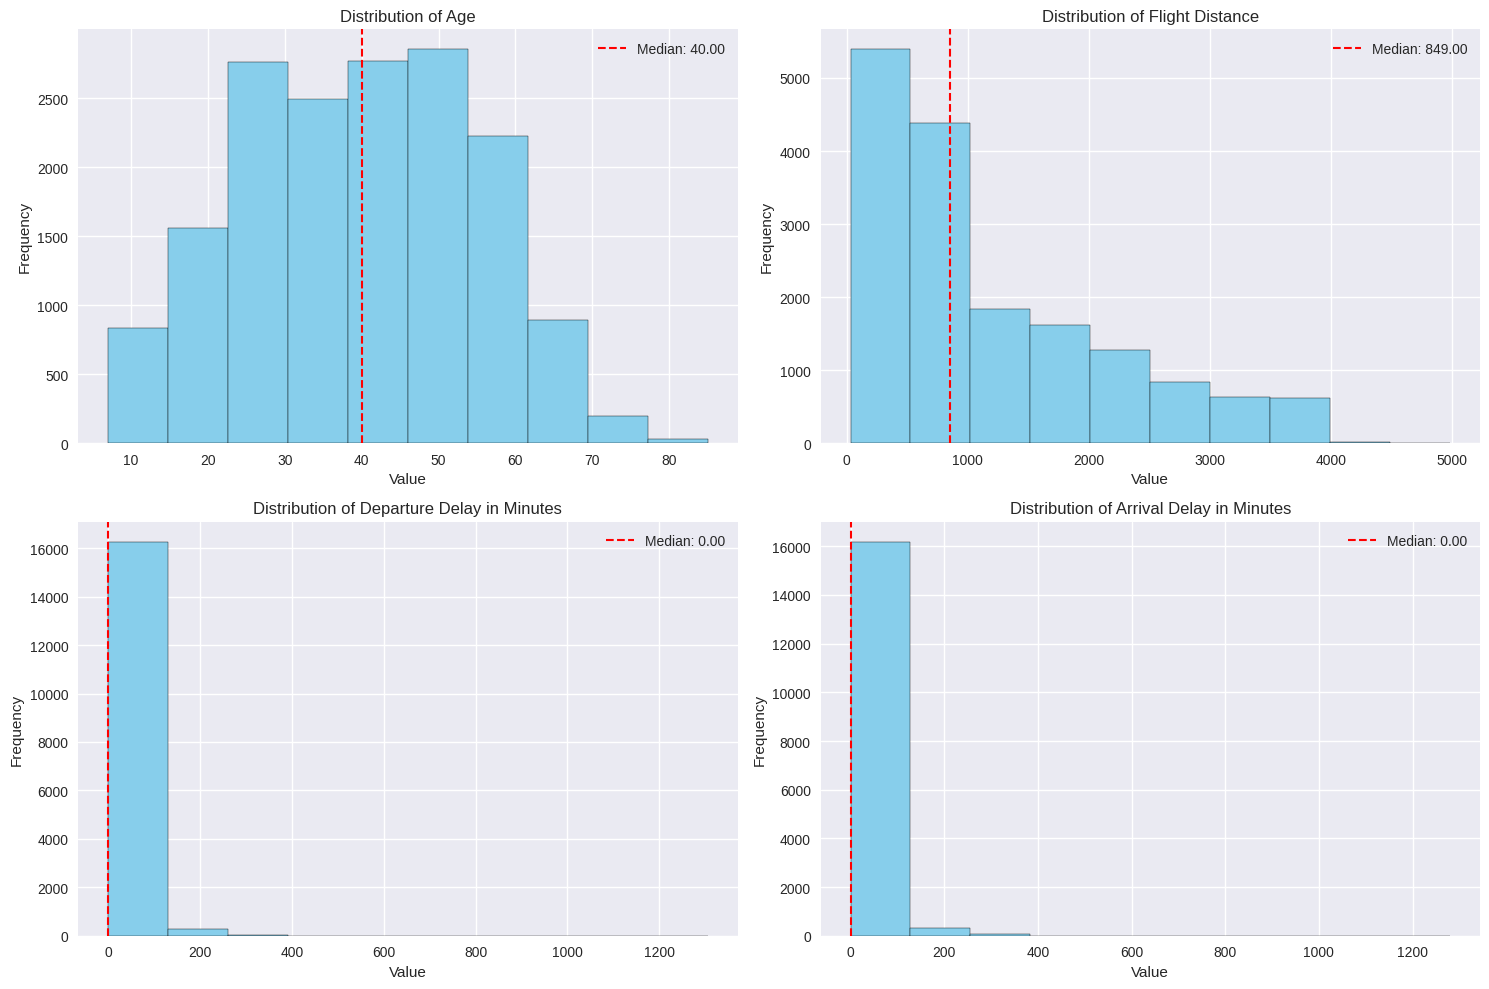

In [ ]:
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    ax.hist(raw_data[col].dropna(), bins=10, edgecolor='black', color='skyblue')
    median_val = raw_data[col].median()
    ax.axvline(median_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Median: {median_val:.2f}')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# # Categorical columns
# categorical_cols = ['Inflight wifi service',
#        'Departure/Arrival time convenient', 'Ease of Online booking',
#        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
#        'Inflight entertainment', 'On-board service', 'Leg room service',
#        'Baggage handling', 'Checkin service', 'Inflight service',
#        'Cleanliness']

# # Identify numerical columns by excluding categorical columns and 'id'
# numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()
# numerical_cols = [col for col in numerical_cols if col not in categorical_cols + ['id']]

## box plot for numerical attributes

In [ ]:
# one plot for each attribute  except categorical columns using plotly
import plotly.express as px
for col in numerical_cols:
  fig = px.box(raw_data, x=col, orientation='h', color_discrete_sequence=['skyblue'])
  fig.update_layout(
      title=f"Box Plot of {col}",
      xaxis_title="Value",
      yaxis_title="Attribute",
      showlegend=False,
      height=400 # Adjusted height for better viewing of horizontal plots
  )
  fig.show()

Xử lý dữ liệu bị lệch phải by clipping

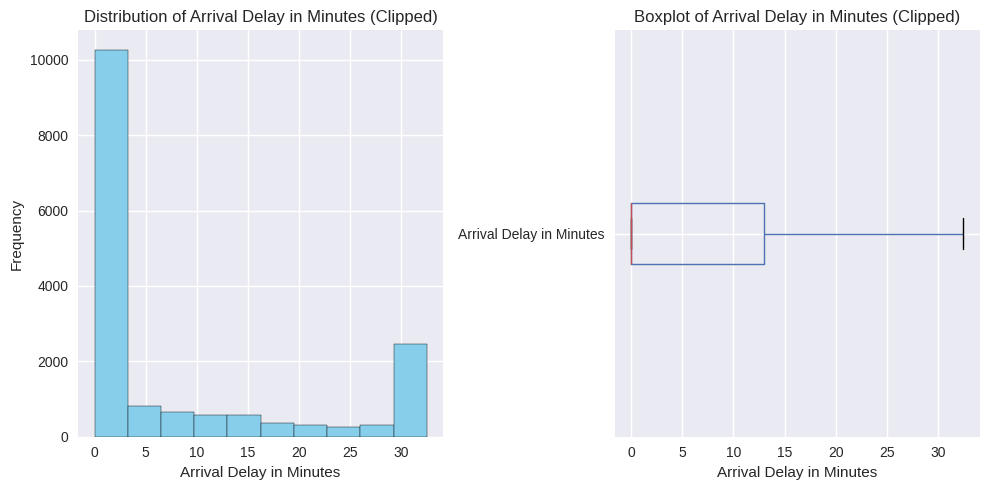

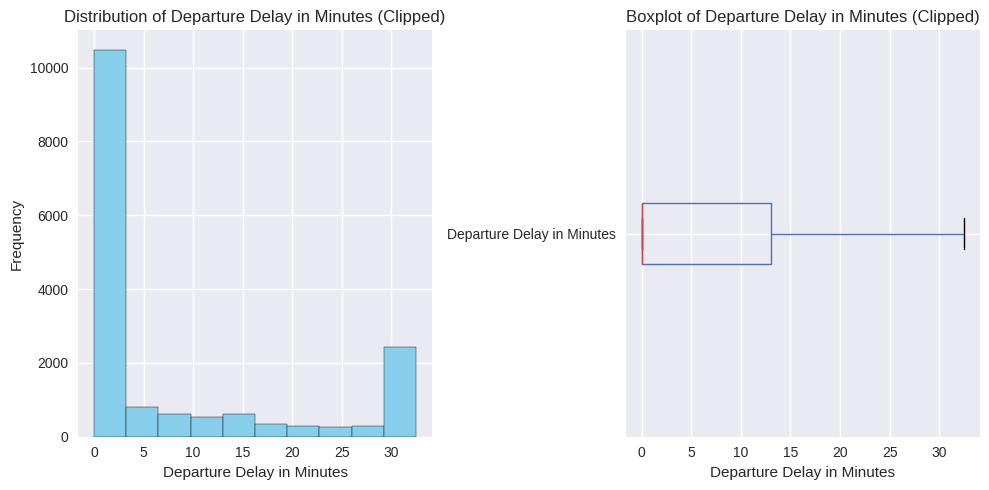

In [ ]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)



#apply to data of Arrival delay in minutes column to get new histogram and box plot
clipped_arrival_delay = BoxplotOutlierClipper(whisker_coeff=1.5).fit_transform(raw_data['Arrival Delay in Minutes'])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#ax[0].hist(raw_data['Arrival Delay in Minutes'].dropna(), bins=10, edgecolor='black', color='skyblue')
ax[0].hist(clipped_arrival_delay, bins=10, edgecolor='black', color='skyblue')
ax[0].set_title('Distribution of Arrival Delay in Minutes (Clipped)')
ax[0].set_xlabel('Arrival Delay in Minutes')
ax[0].set_ylabel('Frequency')
clipped_arrival_delay.to_frame().boxplot(ax=ax[1], vert=False); # Add boxplot
ax[1].set_title('Boxplot of Arrival Delay in Minutes (Clipped)') # Add title to boxplot
ax[1].set_xlabel('Arrival Delay in Minutes') # Add x-label to boxplot
plt.tight_layout()
plt.show()


#apply to data of Departure delay in minutes column to get new histogram and box plot
clipped_departure_delay = BoxplotOutlierClipper(whisker_coeff=1.5).fit_transform(raw_data['Departure Delay in Minutes'])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(clipped_departure_delay, bins=10, edgecolor='black', color='skyblue') # Use clipped data for histogram
ax[0].set_title('Distribution of Departure Delay in Minutes (Clipped)') # Update title
ax[0].set_xlabel('Departure Delay in Minutes')
ax[0].set_ylabel('Frequency')
clipped_departure_delay.to_frame().boxplot(ax=ax[1], vert=False); # Add boxplot for clipped data
ax[1].set_title('Boxplot of Departure Delay in Minutes (Clipped)') # Add title to boxplot
ax[1].set_xlabel('Departure Delay in Minutes') # Add x-label to boxplot
plt.tight_layout()
plt.show()

# bar chart for categories attributes

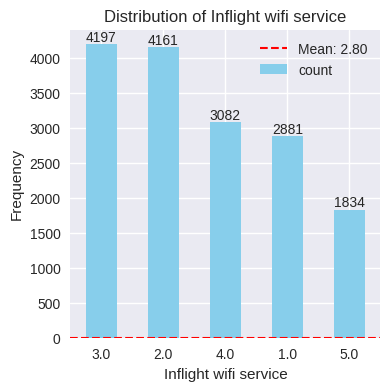

Inflight wifi service
3.0    4197
2.0    4161
4.0    3082
1.0    2881
5.0    1834
Name: count, dtype: int64
-----------


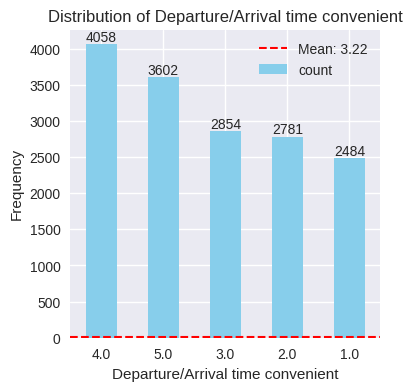

Departure/Arrival time convenient
4.0    4058
5.0    3602
3.0    2854
2.0    2781
1.0    2484
Name: count, dtype: int64
-----------


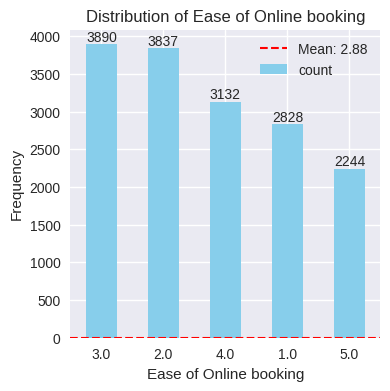

Ease of Online booking
3.0    3890
2.0    3837
4.0    3132
1.0    2828
5.0    2244
Name: count, dtype: int64
-----------


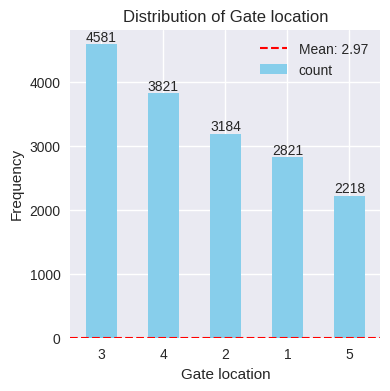

Gate location
3    4581
4    3821
2    3184
1    2821
5    2218
Name: count, dtype: int64
-----------


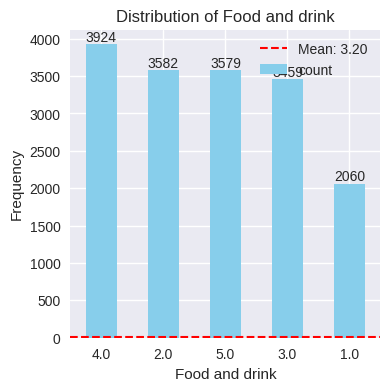

Food and drink
4.0    3924
2.0    3582
5.0    3579
3.0    3459
1.0    2060
Name: count, dtype: int64
-----------


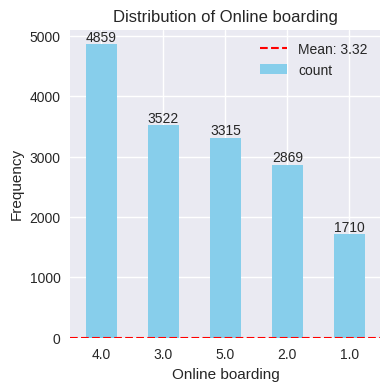

Online boarding
4.0    4859
3.0    3522
5.0    3315
2.0    2869
1.0    1710
Name: count, dtype: int64
-----------


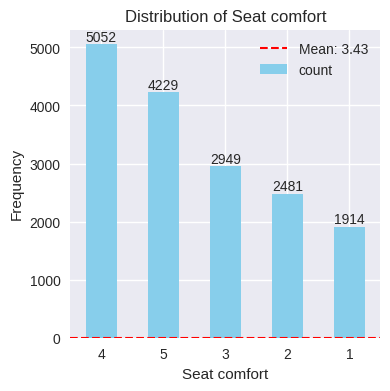

Seat comfort
4    5052
5    4229
3    2949
2    2481
1    1914
Name: count, dtype: int64
-----------


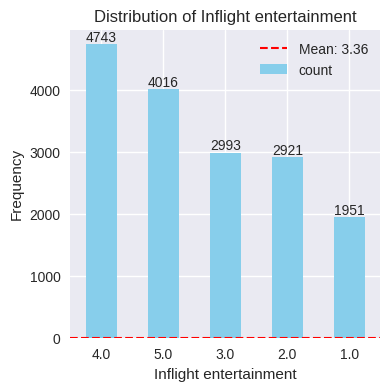

Inflight entertainment
4.0    4743
5.0    4016
3.0    2993
2.0    2921
1.0    1951
Name: count, dtype: int64
-----------


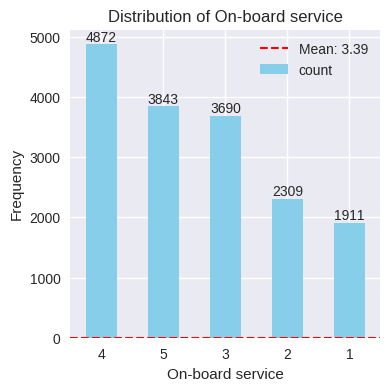

On-board service
4    4872
5    3843
3    3690
2    2309
1    1911
Name: count, dtype: int64
-----------


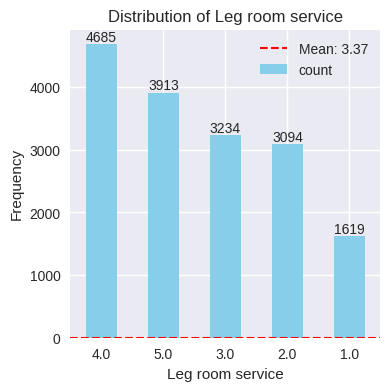

Leg room service
4.0    4685
5.0    3913
3.0    3234
2.0    3094
1.0    1619
Name: count, dtype: int64
-----------


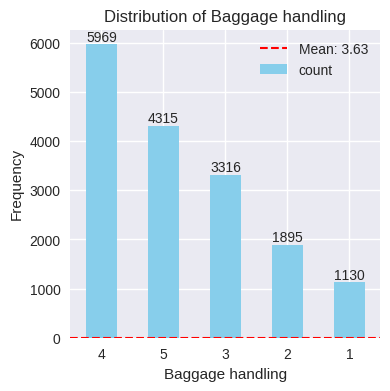

Baggage handling
4    5969
5    4315
3    3316
2    1895
1    1130
Name: count, dtype: int64
-----------


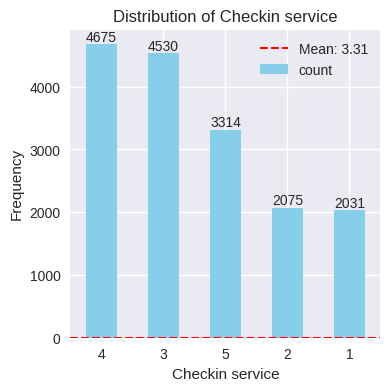

Checkin service
4    4675
3    4530
5    3314
2    2075
1    2031
Name: count, dtype: int64
-----------


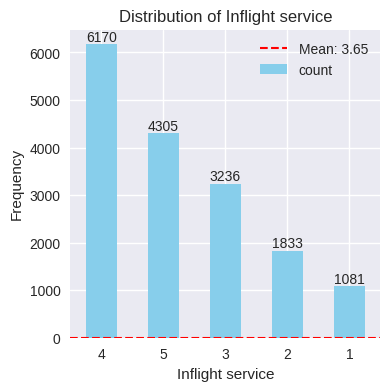

Inflight service
4    6170
5    4305
3    3236
2    1833
1    1081
Name: count, dtype: int64
-----------


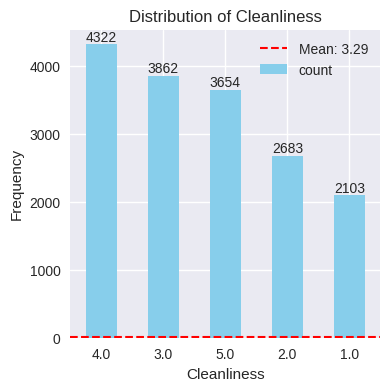

Cleanliness
4.0    4322
3.0    3862
5.0    3654
2.0    2683
1.0    2103
Name: count, dtype: int64
-----------


In [ ]:
#bar chart for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(4, 4))
    value_counts = raw_data[col].value_counts()
    mean_val = raw_data[col].mean()

    # Sort value_counts by mean_val (descending)
    # Create a temporary series to hold the mean for sorting
    temp_sort = pd.Series(index=value_counts.index, data=[mean_val] * len(value_counts))
    sorted_value_counts = value_counts.sort_values(ascending=False)


    sorted_value_counts.plot.bar(color='skyblue')
    #add mean
    plt.axhline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.legend()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)

    # Add column name
    for i, v in enumerate(sorted_value_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.show()
    print(value_counts)
    print('-----------')

# pie chart for the object attribute

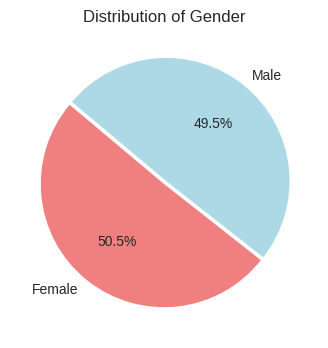

Gender
Female    8397
Male      8228
Name: count, dtype: int64
-----------


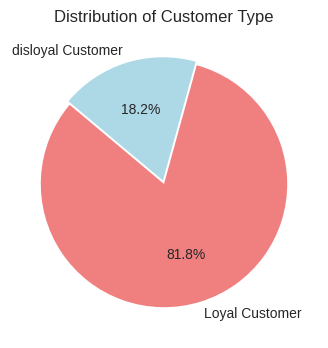

Customer Type
Loyal Customer       13604
disloyal Customer     3021
Name: count, dtype: int64
-----------


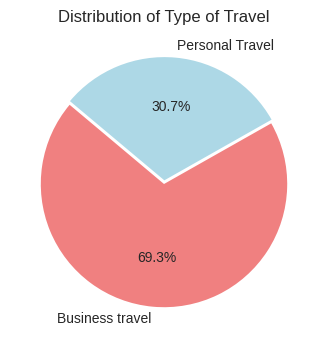

Type of Travel
Business travel    11522
Personal Travel     5103
Name: count, dtype: int64
-----------


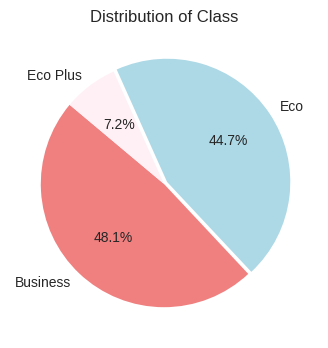

Class
Business    7996
Eco         7435
Eco Plus    1194
Name: count, dtype: int64
-----------


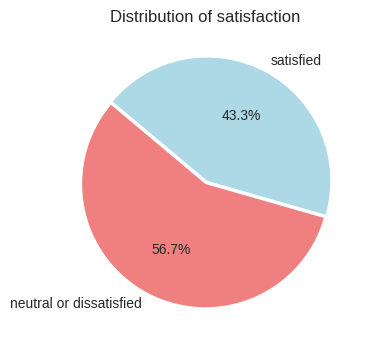

satisfaction
neutral or dissatisfied    9421
satisfied                  7204
Name: count, dtype: int64
-----------


In [ ]:
# Identify obj columns
obj_cols = raw_data.select_dtypes(include='object').columns.tolist()

# Plot pie charts for obj columns
for col in obj_cols:
    plt.figure(figsize=(4, 4))
    value_counts = raw_data[col].value_counts()
    num_categories = len(value_counts)
    # Create an explode tuple based on the number of categories
    explode_tuple = tuple([0.03 if i == 1 else 0 for i in range(num_categories)])

    value_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=(['lightcoral','lightblue','lavenderblush']), explode=explode_tuple)
    plt.title(f'Distribution of {col}')
    plt.ylabel('') # Remove the default ylabel
    plt.show()
    print(value_counts)
    print('-----------')


## 3. Explore multiple attributes relationship of the dataset

In [ ]:
numerical_cols

['Age',
 'satisfaction',
 'Class',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Customer Type',
 'Gender',
 'Type of Travel',
 'Flight Distance']

In [ ]:
categorical_cols

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

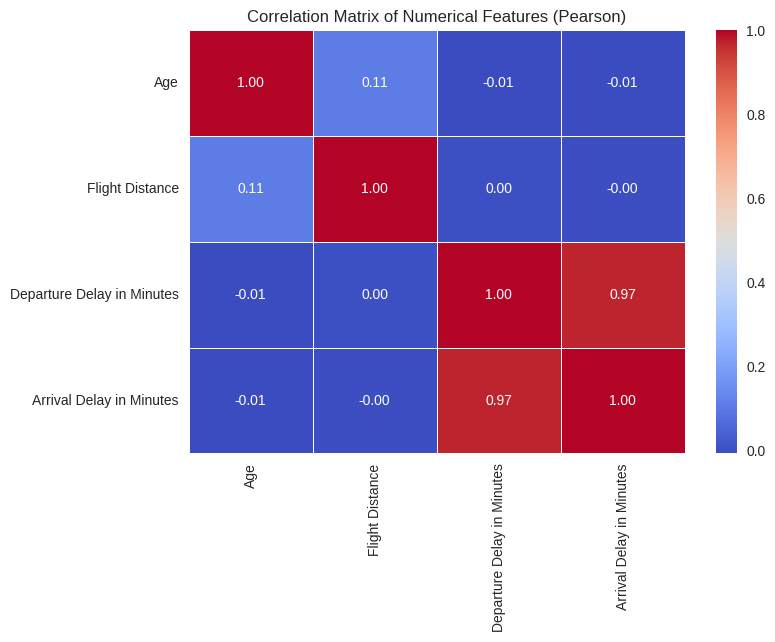

In [ ]:
# Calculate the correlation matrix for numerical features exclude categorical_cols
numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]
correlation_matrix_p = raw_data[numerical_cols].corr(method='pearson') #using pearson

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix_p, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Pearson)')
plt.show()




In [ ]:
numerical_cols

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

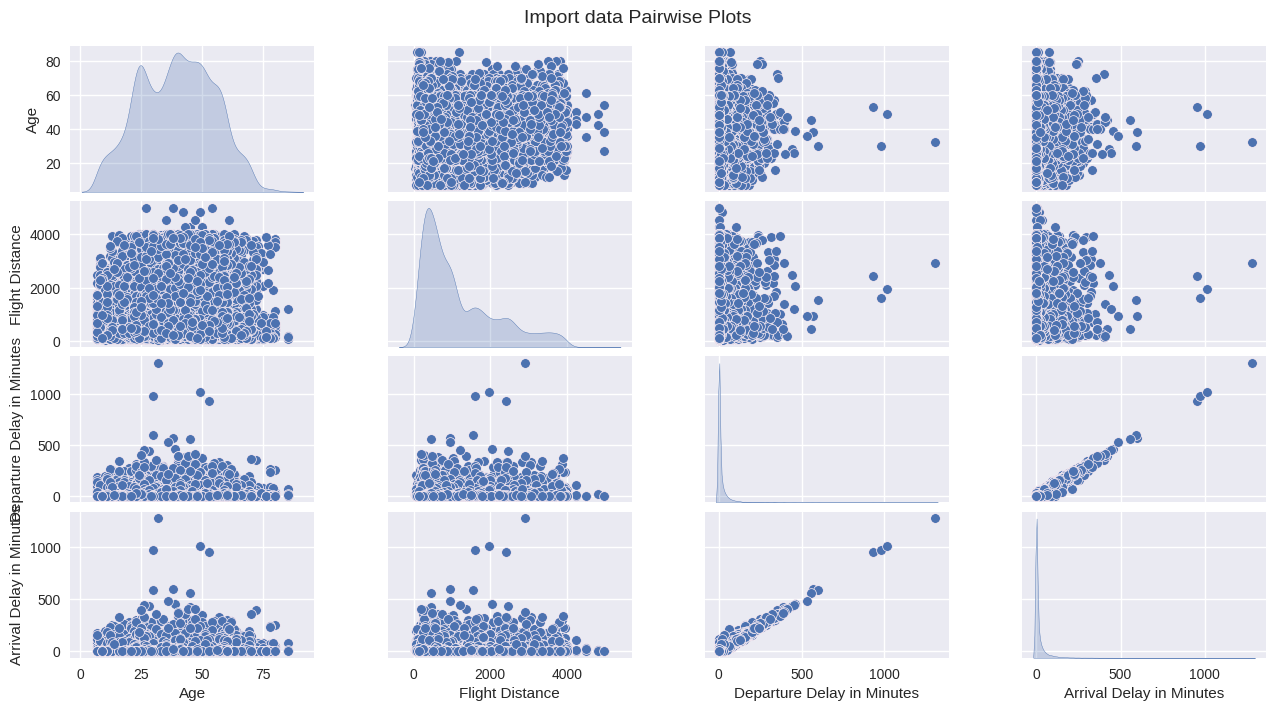

In [ ]:
# pairplot
pp = sns.pairplot(raw_data[numerical_cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor='lavenderblush', linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Import data Pairwise Plots', fontsize=14)

#chi square

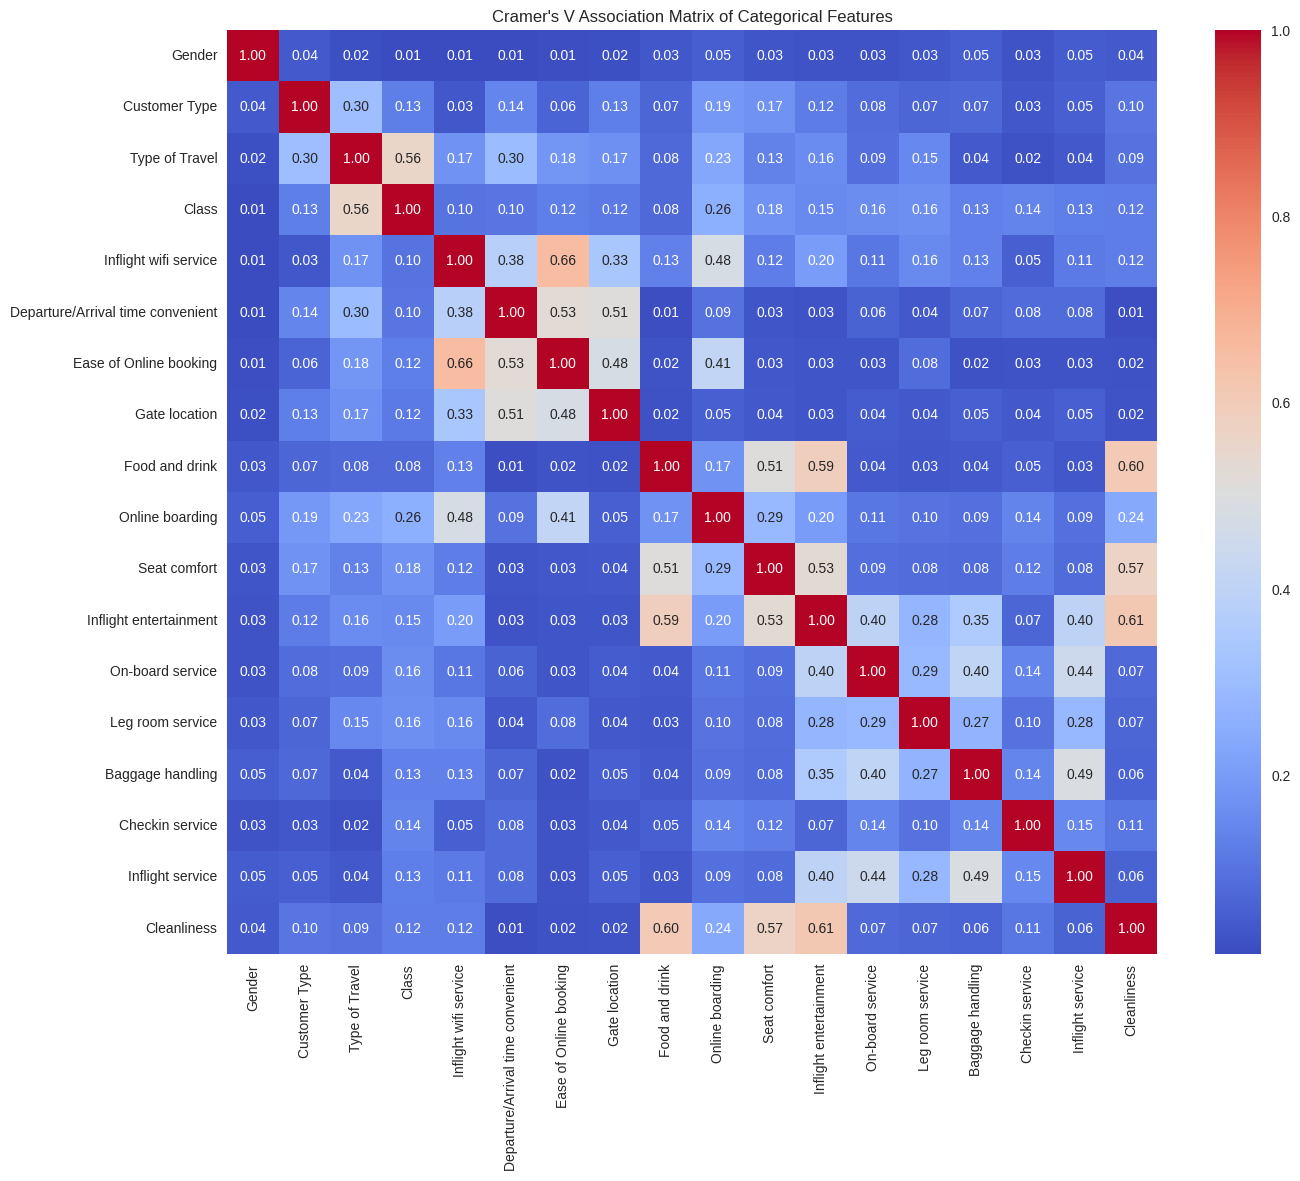

In [ ]:
from scipy.stats import chi2_contingency
# List of chi2 columns
chi2_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink',
             'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
# Function to calculate Cramer's V
def cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency.shape)-1)))
# Create empty matrix
n = len(chi2_cols)
cramers_matrix = pd.DataFrame(np.zeros((n, n)), index=chi2_cols, columns=chi2_cols)
# Fill matrix
for col1 in chi2_cols:
    for col2 in chi2_cols:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0  # Perfect association with itself
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(raw_data[col1], raw_data[col2])
# heatmap visualization
plt.figure(figsize=(15,12))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramer's V Association Matrix of Categorical Features")
plt.show()

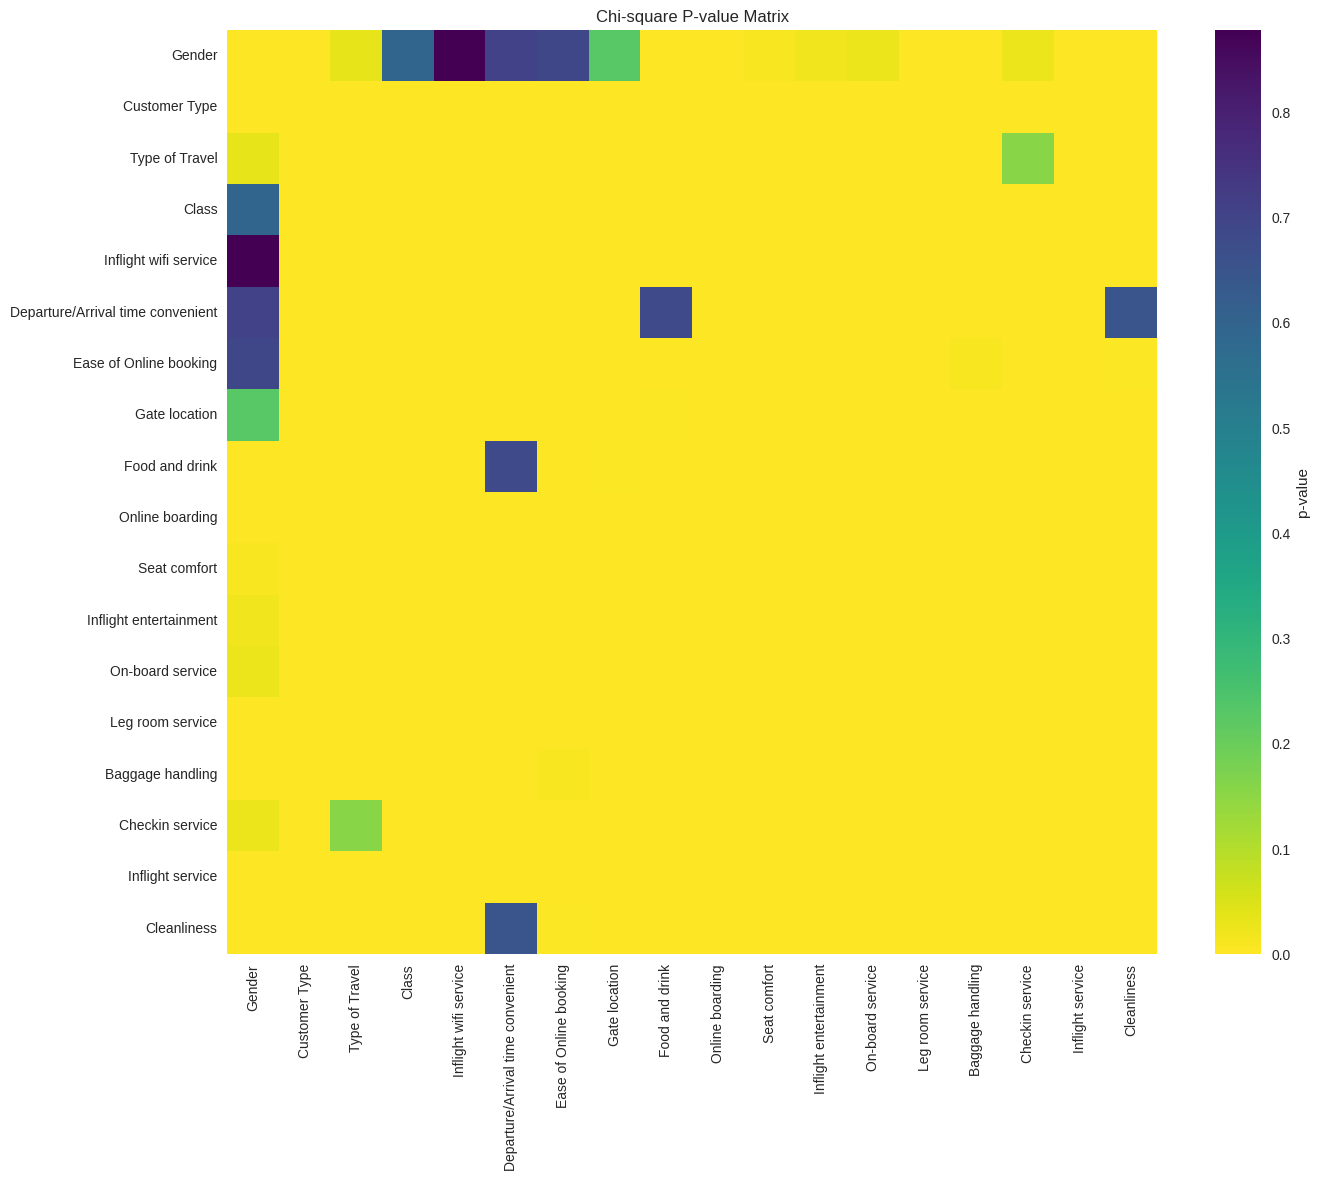

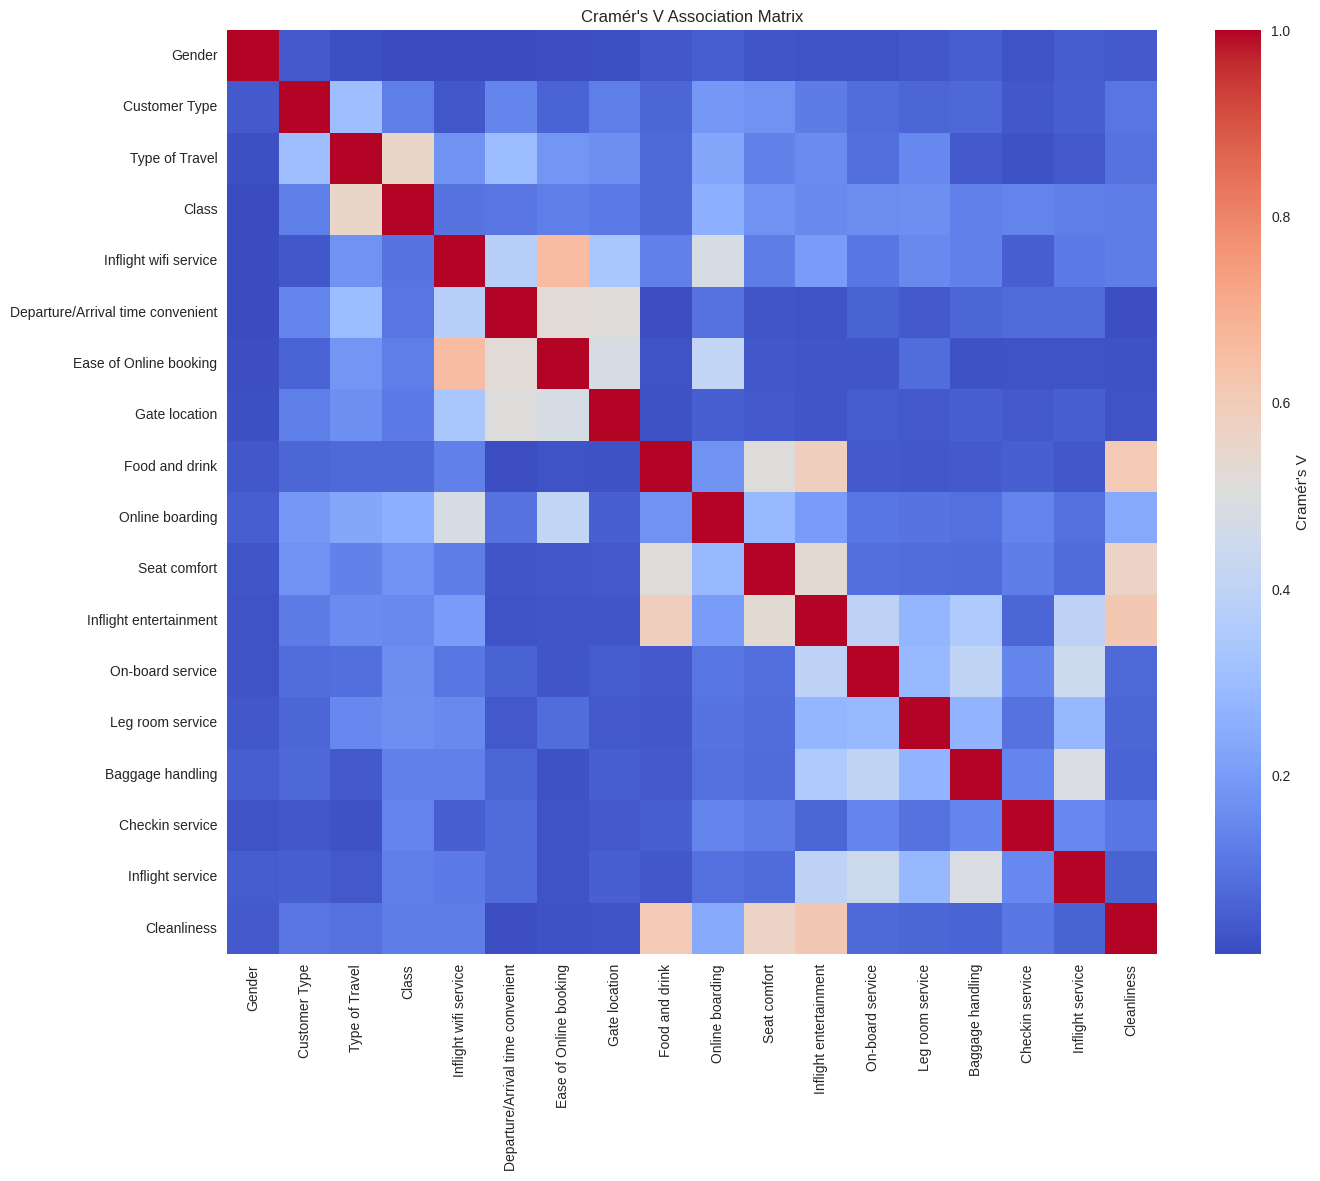

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Your categorical features
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

# Functions
def chi2_and_cramers_v(x, y):
    contingency = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency)
    n = contingency.sum().sum()
    # Avoid divide by zero
    if min(contingency.shape) == 1:
        return p, 0
    cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape)-1)))
    return p, cramers_v

# Initialize matrices
n = len(categorical_columns)
p_matrix = pd.DataFrame(np.ones((n, n)), index=categorical_columns, columns=categorical_columns)
cramers_matrix = pd.DataFrame(np.zeros((n, n)), index=categorical_columns, columns=categorical_columns)

# Fill matrices
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            p_matrix.loc[col1, col2] = 0.0
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            p, cv = chi2_and_cramers_v(raw_data[col1], raw_data[col2])
            p_matrix.loc[col1, col2] = p
            cramers_matrix.loc[col1, col2] = cv

# # Display matrices
# print("P-value Matrix")
# print(p_matrix)

# print("\nCramer's V Matrix")
# print(cramers_matrix)

# Heatmaps
plt.figure(figsize=(15,12))
sns.heatmap(p_matrix, annot=False, cmap='viridis_r', cbar_kws={'label': 'p-value'})
plt.title("Chi-square P-value Matrix")
plt.show()

plt.figure(figsize=(15,12))
sns.heatmap(cramers_matrix, annot=False, cmap='coolwarm', cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V Association Matrix")
plt.show()

## TASK 1B. DATA PREPROCESSING

# 1. Binning techniques
1.1 Equi-width binning

In [ ]:
# departure delay
bins_dep_equiwidth = 5


X['Departure_EquiWidth_Bin'] = pd.cut(X['Departure Delay in Minutes'], bins=bins_dep_equiwidth, include_lowest=True)
X['Departure_EquiWidth_Bin'] = X['Departure_EquiWidth_Bin'].cat.rename_categories([
    f'Bin {i + 1}: {interval}'
    for i, interval in enumerate(X['Departure_EquiWidth_Bin'].cat.categories)
])
dep_equiwidth_stats = X.groupby('Departure_EquiWidth_Bin')['Departure Delay in Minutes']\
    .agg(['min', 'max', 'mean', 'count'])\
    .rename(columns={'min': 'bin_min', 'max': 'bin_max', 'mean': 'bin_mean', 'count': 'bin_size'})
dep_equiwidth_stats

,bin_min,bin_max,bin_mean,bin_size
Departure_EquiWidth_Bin,,,,
"Bin 1: (-1.3059999999999998, 261.0]",0,260,13.724808,16563
"Bin 2: (261.0, 522.0]",265,460,329.203704,54
"Bin 3: (522.0, 783.0]",531,600,564.000000,4
"Bin 4: (783.0, 1044.0]",930,1017,975.000000,3
"Bin 5: (1044.0, 1305.0]",1305,1305,1305.000000,1


In [ ]:
X[['Departure Delay in Minutes', 'Departure_EquiWidth_Bin']]\
    .merge(dep_equiwidth_stats, on='Departure_EquiWidth_Bin')\
    .sort_values('Departure Delay in Minutes')

,Departure Delay in Minutes,Departure_EquiWidth_Bin,bin_min,bin_max,bin_mean,bin_size
6944,0,"Bin 1: (-1.3059999999999998, 261.0]",0,260,13.724808,16563
12838,0,"Bin 1: (-1.3059999999999998, 261.0]",0,260,13.724808,16563
12834,0,"Bin 1: (-1.3059999999999998, 261.0]",0,260,13.724808,16563
12833,0,"Bin 1: (-1.3059999999999998, 261.0]",0,260,13.724808,16563
6959,0,"Bin 1: (-1.3059999999999998, 261.0]",0,260,13.724808,16563
...,...,...,...,...,...,...
11955,600,"Bin 3: (522.0, 783.0]",531,600,564.000000,4
497,930,"Bin 4: (783.0, 1044.0]",930,1017,975.000000,3
2973,978,"Bin 4: (783.0, 1044.0]",930,1017,975.000000,3
14873,1017,"Bin 4: (783.0, 1044.0]",930,1017,975.000000,3


In [ ]:
# arrival delay
bins_arr_equiwidth = 5

X['Arrival_EquiWidth_Bin'] = pd.cut(X['Arrival Delay in Minutes'], bins=bins_arr_equiwidth, include_lowest=True)
X['Arrival_EquiWidth_Bin'] = X['Arrival_EquiWidth_Bin'].cat.rename_categories([
    f'Bin {i + 1}: {interval}'
    for i, interval in enumerate(X['Arrival_EquiWidth_Bin'].cat.categories)
])
arr_equiwidth_stats = X.groupby('Arrival_EquiWidth_Bin')['Arrival Delay in Minutes']\
    .agg(['min', 'max', 'mean', 'count'])\
    .rename(columns={'min': 'bin_min', 'max': 'bin_max', 'mean': 'bin_mean', 'count': 'bin_size'})
arr_equiwidth_stats

,bin_min,bin_max,bin_mean,bin_size
Arrival_EquiWidth_Bin,,,,
"Bin 1: (-1.281, 256.0]",0.0,255.0,14.020418,16505
"Bin 2: (256.0, 512.0]",257.0,485.0,323.918033,61
"Bin 3: (512.0, 768.0]",555.0,600.0,581.333333,3
"Bin 4: (768.0, 1024.0]",952.0,1011.0,977.666667,3
"Bin 5: (1024.0, 1280.0]",1280.0,1280.0,1280.000000,1


In [ ]:
X[['Arrival Delay in Minutes', 'Arrival_EquiWidth_Bin']]\
    .merge(arr_equiwidth_stats, on='Arrival_EquiWidth_Bin')\
    .sort_values('Arrival Delay in Minutes')

,Arrival Delay in Minutes,Arrival_EquiWidth_Bin,bin_min,bin_max,bin_mean,bin_size
6815,0.0,"Bin 1: (-1.281, 256.0]",0.0,255.0,14.020418,16505
6834,0.0,"Bin 1: (-1.281, 256.0]",0.0,255.0,14.020418,16505
6833,0.0,"Bin 1: (-1.281, 256.0]",0.0,255.0,14.020418,16505
6830,0.0,"Bin 1: (-1.281, 256.0]",0.0,255.0,14.020418,16505
6829,0.0,"Bin 1: (-1.281, 256.0]",0.0,255.0,14.020418,16505
...,...,...,...,...,...,...
4008,600.0,"Bin 3: (512.0, 768.0]",555.0,600.0,581.333333,3
493,952.0,"Bin 4: (768.0, 1024.0]",952.0,1011.0,977.666667,3
2962,970.0,"Bin 4: (768.0, 1024.0]",952.0,1011.0,977.666667,3
14828,1011.0,"Bin 4: (768.0, 1024.0]",952.0,1011.0,977.666667,3


In [ ]:
#put the new column with equiwidth in dataset
raw_data['Departure_EquiWidth_Bin'] = X['Departure_EquiWidth_Bin']
raw_data['Arrival_EquiWidth_Bin'] = X['Arrival_EquiWidth_Bin']

1.2 Equi-depth binning

In [ ]:
# departure delay
bins_dep_equidepth = 10

X['Departure_EquiDepth_Bin'] = pd.qcut(X['Departure Delay in Minutes'], q=bins_dep_equidepth, duplicates='drop')
X['Departure_EquiDepth_Bin'] = X['Departure_EquiDepth_Bin'].cat.rename_categories([
    f'Bin {i + 1}: {interval}'
    for i, interval in enumerate(X['Departure_EquiDepth_Bin'].cat.categories)
])
dep_equidepth_stats = X.groupby('Departure_EquiDepth_Bin')['Departure Delay in Minutes']\
    .agg(['min', 'max', 'mean', 'count'])\
    .rename(columns={'min': 'bin_min', 'max': 'bin_max', 'mean': 'bin_mean', 'count': 'bin_size'})
dep_equidepth_stats

,bin_min,bin_max,bin_mean,bin_size
Departure_EquiDepth_Bin,,,,
"Bin 1: (-0.001, 2.0]",0,2,0.118359,10164
"Bin 2: (2.0, 8.0]",3,8,5.186928,1530
"Bin 3: (8.0, 19.0]",9,19,13.407253,1682
"Bin 4: (19.0, 44.0]",20,44,29.971178,1596
"Bin 5: (44.0, 1305.0]",45,1305,104.091349,1653


In [ ]:
X[['Departure Delay in Minutes', 'Departure_EquiDepth_Bin']]\
    .merge(dep_equidepth_stats, on='Departure_EquiDepth_Bin')\
    .sort_values('Departure Delay in Minutes')

,Departure Delay in Minutes,Departure_EquiDepth_Bin,bin_min,bin_max,bin_mean,bin_size
6944,0,"Bin 1: (-0.001, 2.0]",0,2,0.118359,10164
12838,0,"Bin 1: (-0.001, 2.0]",0,2,0.118359,10164
12834,0,"Bin 1: (-0.001, 2.0]",0,2,0.118359,10164
12833,0,"Bin 1: (-0.001, 2.0]",0,2,0.118359,10164
6959,0,"Bin 1: (-0.001, 2.0]",0,2,0.118359,10164
...,...,...,...,...,...,...
11955,600,"Bin 5: (44.0, 1305.0]",45,1305,104.091349,1653
497,930,"Bin 5: (44.0, 1305.0]",45,1305,104.091349,1653
2973,978,"Bin 5: (44.0, 1305.0]",45,1305,104.091349,1653
14873,1017,"Bin 5: (44.0, 1305.0]",45,1305,104.091349,1653


In [ ]:
# arrival delay
bins_arr_equidepth = 10

X['Arrival_EquiDepth_Bin'] = pd.qcut(X['Arrival Delay in Minutes'], q=bins_arr_equidepth, duplicates='drop')
X['Arrival_EquiDepth_Bin'] = X['Arrival_EquiDepth_Bin'].cat.rename_categories([
    f'Bin {i + 1}: {interval}'
    for i, interval in enumerate(X['Arrival_EquiDepth_Bin'].cat.categories)
])
arr_equidepth_stats = X.groupby('Arrival_EquiDepth_Bin')['Arrival Delay in Minutes']\
    .agg(['min', 'max', 'mean', 'count'])\
    .rename(columns={'min': 'bin_min', 'max': 'bin_max', 'mean': 'bin_mean', 'count': 'bin_size'})
arr_equidepth_stats

,bin_min,bin_max,bin_mean,bin_size
Arrival_EquiDepth_Bin,,,,
"Bin 1: (-0.001, 2.0]",0.0,2.0,0.100010,9949
"Bin 2: (2.0, 9.0]",3.0,9.0,5.703537,1781
"Bin 3: (9.0, 20.0]",10.0,20.0,14.384425,1618
"Bin 4: (20.0, 45.0]",21.0,45.0,30.830057,1577
"Bin 5: (45.0, 1280.0]",46.0,1280.0,105.629248,1648


In [ ]:
X[['Arrival Delay in Minutes', 'Arrival_EquiDepth_Bin']]\
    .merge(arr_equidepth_stats, on='Arrival_EquiDepth_Bin')\
    .sort_values('Arrival Delay in Minutes')

,Arrival Delay in Minutes,Arrival_EquiDepth_Bin,bin_min,bin_max,bin_mean,bin_size
6815,0.0,"Bin 1: (-0.001, 2.0]",0.0,2.0,0.100010,9949
6834,0.0,"Bin 1: (-0.001, 2.0]",0.0,2.0,0.100010,9949
6833,0.0,"Bin 1: (-0.001, 2.0]",0.0,2.0,0.100010,9949
6830,0.0,"Bin 1: (-0.001, 2.0]",0.0,2.0,0.100010,9949
6829,0.0,"Bin 1: (-0.001, 2.0]",0.0,2.0,0.100010,9949
...,...,...,...,...,...,...
4008,600.0,"Bin 5: (45.0, 1280.0]",46.0,1280.0,105.629248,1648
493,952.0,"Bin 5: (45.0, 1280.0]",46.0,1280.0,105.629248,1648
2962,970.0,"Bin 5: (45.0, 1280.0]",46.0,1280.0,105.629248,1648
14828,1011.0,"Bin 5: (45.0, 1280.0]",46.0,1280.0,105.629248,1648


In [ ]:
#put the new coulumn with equidepth in the dataset
raw_data['Departure_EquiDepth_Bin'] = X['Departure_EquiDepth_Bin']
raw_data['Arrival_EquiDepth_Bin'] = X['Arrival_EquiDepth_Bin']

#2. Normalization using min-max and z-score for Flight Distance

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Normalization
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X['Flight-Distance_MinMax'] = min_max_scaler.fit_transform(X[['Flight Distance']])

# Z-score Normalization
z_score_scaler = StandardScaler()
X['Flight-Distance_ZScore'] = z_score_scaler.fit_transform(X[['Flight Distance']])

# Calculating basic statistics for interpretation
normalize_stats = pd.concat([
    X[['Flight Distance']].describe(),
    X[['Flight-Distance_MinMax']].describe(),
    X[['Flight-Distance_ZScore']].describe()
], axis=1)

#normalize_stats.columns = ['Flight Distance', 'Flight Distance_MinMax', 'Flight Distance_ZScore']
normalize_stats


,Flight Distance,Flight-Distance_MinMax,Flight-Distance_ZScore
count,16625.000000,16625.000000,1.662500e+04
mean,1187.896481,0.233622,-1.376209e-16
std,987.642443,0.199443,1.000030e+00
min,31.000000,0.000000,-1.171407e+00
25%,416.000000,0.077746,-7.815781e-01
50%,849.000000,0.165186,-3.431471e-01
75%,1746.000000,0.346325,5.651036e-01
max,4983.000000,1.000000,3.842704e+00


In [ ]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler(feature_range=(0, 1))
m_scaler.fit(raw_data[['Flight Distance']])

# transform
raw_data['Flight Distance (MinMax)'] = m_scaler.transform(raw_data[['Flight Distance']])
print(raw_data[['Flight Distance (MinMax)', 'Flight Distance']])



       Flight Distance (MinMax)  Flight Distance
0                      0.316438             1598
1                      0.066640              361
2                      0.169023              868
3                      0.050283              280
4                      0.055937              308
...                         ...              ...
16620                  0.561793             2813
16621                  0.353998             1784
16622                  0.039782              228
16623                  0.020800              134
16624                  0.670436             3351

[16625 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

# z-score transformation
scaler = StandardScaler()

# fit
scaler.fit(raw_data[['Flight Distance']])

# transform
raw_data['Flight Distance (Z-score)'] = scaler.transform(raw_data[['Flight Distance']])
print(raw_data[['Flight Distance (Z-score)', 'Flight Distance']])


# do both the fit and transform at the same time
#scaler.fit_transform(raw_data[['Flight Distance']])

       Flight Distance (Z-score)  Flight Distance
0                       0.415247             1598
1                      -0.837268              361
2                      -0.323909              868
3                      -0.919284              280
4                      -0.890933              308
...                          ...              ...
16620                   1.645487             2813
16621                   0.603580             1784
16622                  -0.971936              228
16623                  -1.067115              134
16624                   2.190235             3351

[16625 rows x 2 columns]


In [ ]:
#put the new column with min-max normalization and z-score normalization
raw_data['Flight Distance (MinMax)'] = X['Flight-Distance_MinMax']
raw_data['Flight Distance (Z-score)'] = X['Flight-Distance_ZScore']
display(raw_data.head())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure_EquiWidth_Bin,Arrival_EquiWidth_Bin,Departure_EquiDepth_Bin,Arrival_EquiDepth_Bin,Flight Distance (MinMax),Flight Distance (Z-score)
0,Female,Loyal Customer,58,Personal Travel,Eco,1598,3.0,4.0,2.0,1,...,3.0,0,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.316438,0.415247
1,Female,Loyal Customer,7,Personal Travel,Eco,361,1.0,5.0,4.0,2,...,4.0,17,13.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 3: (8.0, 19.0]","Bin 3: (9.0, 20.0]",0.066640,-0.837268
2,Female,disloyal Customer,39,Business travel,Business,868,3.0,4.0,4.0,5,...,2.0,0,2.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.169023,-0.323909
3,Female,Loyal Customer,67,Business travel,Eco,280,4.0,3.0,3.0,3,...,2.0,0,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.050283,-0.919284
4,Female,Loyal Customer,54,Personal Travel,Eco,308,1.0,5.0,1.0,4,...,3.0,7,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 2: (2.0, 8.0]","Bin 1: (-0.001, 2.0]",0.055937,-0.890933


#3 Discretise the age attribute into 5 categories
o	Young (ages 21 and younger)
o	Early Adulthood (ages 22--34).
o	Early Middle Age (ages 35--44),
  Late Middle Age (ages 45--64), and
o	Late Adulthood (ages 65 and older).

In [ ]:
#import discretise
from sklearn.preprocessing import KBinsDiscretizer

# Discretize 'Age' into 5 categories
# Define the age bin edges
bins = [0, 21, 35, 45, 65, float('inf')]
labels = ['Young', 'Early Adulthood', 'Early Middle Age', 'Late Middle Age', 'Late Adulthood'] # Define the age categories
X['Age_Category'] = pd.cut(X['Age'], bins=bins, labels=labels, include_lowest=True)

# Calculate the frequency of each category, add min, max, mean of each category
age_category_freq = X['Age_Category'].value_counts()
age_category_stats = X.groupby('Age_Category')['Age'].agg(['min', 'max', 'mean'])

age_category_stats = pd.concat([age_category_stats, age_category_freq], axis=1)
display(age_category_stats)

,min,max,mean,count
Age_Category,,,,
Young,7,21,15.163943,2019
Early Adulthood,22,35,27.986519,4525
Early Middle Age,36,45,40.474852,3877
Late Middle Age,46,65,53.730133,5562
Late Adulthood,66,85,69.353583,642


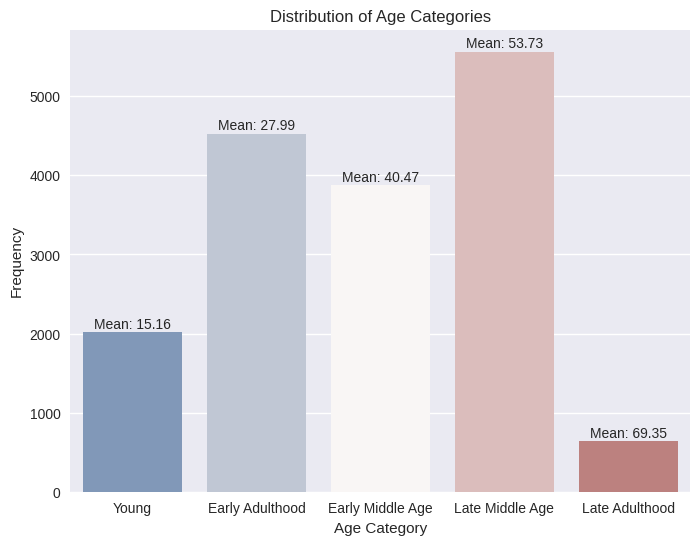

In [ ]:
#chart for the distribution of Age with colorful
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Age_Category', data=X, palette='vlag') # Changed color palette
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Frequency')

# Calculate the mean age for each category
mean_age_per_category = X.groupby('Age_Category')['Age'].mean()

# Add horizontal lines for the mean age in each category
for i, category in enumerate(mean_age_per_category.index):
    mean_value = mean_age_per_category[category]
    # Find the x-coordinate for the center of the bar
    x_coord = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
    # Add text annotation for the mean value above the bar
    ax.text(x_coord, ax.patches[i].get_height() + 50, f'Mean: {mean_value:.2f}', ha='center')

plt.show()

In [ ]:
#transform the dataset and put the new column with bins from disretise
raw_data['Age_Category'] = X['Age_Category']
display(raw_data.head())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Arrival Delay in Minutes,satisfaction,Departure_EquiWidth_Bin,Arrival_EquiWidth_Bin,Departure_EquiDepth_Bin,Arrival_EquiDepth_Bin,Flight Distance (MinMax),Flight Distance (Z-score),Age_Category,Satisfaction (Binary)
0,Female,Loyal Customer,58,Personal Travel,Eco,1598,3.0,4.0,2.0,1,...,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.316438,0.415247,Late Middle Age,0
1,Female,Loyal Customer,7,Personal Travel,Eco,361,1.0,5.0,4.0,2,...,13.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 3: (8.0, 19.0]","Bin 3: (9.0, 20.0]",0.066640,-0.837268,Young,0
2,Female,disloyal Customer,39,Business travel,Business,868,3.0,4.0,4.0,5,...,2.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.169023,-0.323909,Early Middle Age,0
3,Female,Loyal Customer,67,Business travel,Eco,280,4.0,3.0,3.0,3,...,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.050283,-0.919284,Late Adulthood,0
4,Female,Loyal Customer,54,Personal Travel,Eco,308,1.0,5.0,1.0,4,...,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 2: (2.0, 8.0]","Bin 1: (-0.001, 2.0]",0.055937,-0.890933,Late Middle Age,0


# 4. Binarise the satisfaction variable [with values "0" or "1"].

In [ ]:
#binarise the satisfaction column with value 0 or 1 and count

# Create a new binarized column
raw_data['Satisfaction (Binary)'] = raw_data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

#count the binary value
print(raw_data['Satisfaction (Binary)'].value_counts())
#print satisfaction and satisfaction-binary column
display(raw_data[['satisfaction', 'Satisfaction (Binary)']])



Satisfaction (Binary)
0    9421
1    7204
Name: count, dtype: int64


,satisfaction,Satisfaction (Binary)
0,neutral or dissatisfied,0
1,neutral or dissatisfied,0
2,neutral or dissatisfied,0
3,neutral or dissatisfied,0
4,neutral or dissatisfied,0
...,...,...
16620,satisfied,1
16621,satisfied,1
16622,satisfied,1
16623,satisfied,1


In [ ]:
display(raw_data.head())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Arrival Delay in Minutes,satisfaction,Departure_EquiWidth_Bin,Arrival_EquiWidth_Bin,Departure_EquiDepth_Bin,Arrival_EquiDepth_Bin,Flight Distance (MinMax),Flight Distance (Z-score),Age_Category,Satisfaction (Binary)
0,Female,Loyal Customer,58,Personal Travel,Eco,1598,3.0,4.0,2.0,1,...,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.316438,0.415247,Late Middle Age,0
1,Female,Loyal Customer,7,Personal Travel,Eco,361,1.0,5.0,4.0,2,...,13.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 3: (8.0, 19.0]","Bin 3: (9.0, 20.0]",0.066640,-0.837268,Young,0
2,Female,disloyal Customer,39,Business travel,Business,868,3.0,4.0,4.0,5,...,2.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.169023,-0.323909,Early Middle Age,0
3,Female,Loyal Customer,67,Business travel,Eco,280,4.0,3.0,3.0,3,...,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 1: (-0.001, 2.0]","Bin 1: (-0.001, 2.0]",0.050283,-0.919284,Late Adulthood,0
4,Female,Loyal Customer,54,Personal Travel,Eco,308,1.0,5.0,1.0,4,...,0.0,neutral or dissatisfied,"Bin 1: (-1.3059999999999998, 261.0]","Bin 1: (-1.281, 256.0]","Bin 2: (2.0, 8.0]","Bin 1: (-0.001, 2.0]",0.055937,-0.890933,Late Middle Age,0


In [ ]:
#export the new dataset with download
raw_data.to_csv('preprocessed_data.csv', index=False)
from google.colab import files
files.download('preprocessed_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>